<a href="https://colab.research.google.com/github/Ankda/Ankda/blob/main/Copy_of_forecasting_automatic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon (AMZN) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df=pd.read_csv("AMZN.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-27,3256.000000,3260.360107,3230.040039,3230.110107,3230.110107,2561200
1,2021-05-28,3242.000000,3247.989990,3219.699951,3223.070068,3223.070068,2329800
2,2021-06-01,3243.500000,3250.979980,3209.060059,3218.649902,3218.649902,2430000
3,2021-06-02,3223.100098,3235.000000,3208.000000,3233.989990,3233.989990,2014500
4,2021-06-03,3204.229980,3214.439941,3184.030029,3187.010010,3187.010010,2398300
...,...,...,...,...,...,...,...
248,2022-05-20,2191.370117,2197.959961,2100.189941,2151.820068,2151.820068,4968200
249,2022-05-23,2169.219971,2176.379883,2079.000000,2151.139893,2151.139893,5389900
250,2022-05-24,2080.500000,2108.000000,2025.199951,2082.000000,2082.000000,5146700
251,2022-05-25,2073.110107,2163.500000,2073.000000,2135.500000,2135.500000,4656000


In [ ]:
columns=['Data','Close']
ndf=pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Data,Close
0,NaN,3230.110107
1,NaN,3223.070068
2,NaN,3218.649902
3,NaN,3233.989990
4,NaN,3187.010010
...,...,...
248,NaN,2151.820068
249,NaN,2151.139893
250,NaN,2082.000000
251,NaN,2135.500000


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds' , 'Close':'y'})

In [ ]:
prophet_df

,Data,y
0,NaN,3230.110107
1,NaN,3223.070068
2,NaN,3218.649902
3,NaN,3233.989990
4,NaN,3187.010010
...,...,...
248,NaN,2151.820068
249,NaN,2151.139893
250,NaN,2082.000000
251,NaN,2135.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,3224.737516,3263.166244,3181.774034,3221.566647,3221.566647,3.562104e+06
std,354.007418,348.216650,363.167268,357.068924,357.068924,1.592738e+06
min,2055.000000,2108.000000,2025.199951,2082.000000,2082.000000,1.680300e+06
25%,3115.810059,3160.139893,3042.800049,3103.340088,3103.340088,2.571600e+06
50%,3315.010010,3342.530029,3287.139893,3307.239990,3307.239990,3.185300e+06
75%,3441.060059,3473.909912,3403.000000,3444.239990,3444.239990,4.001100e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.361650e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

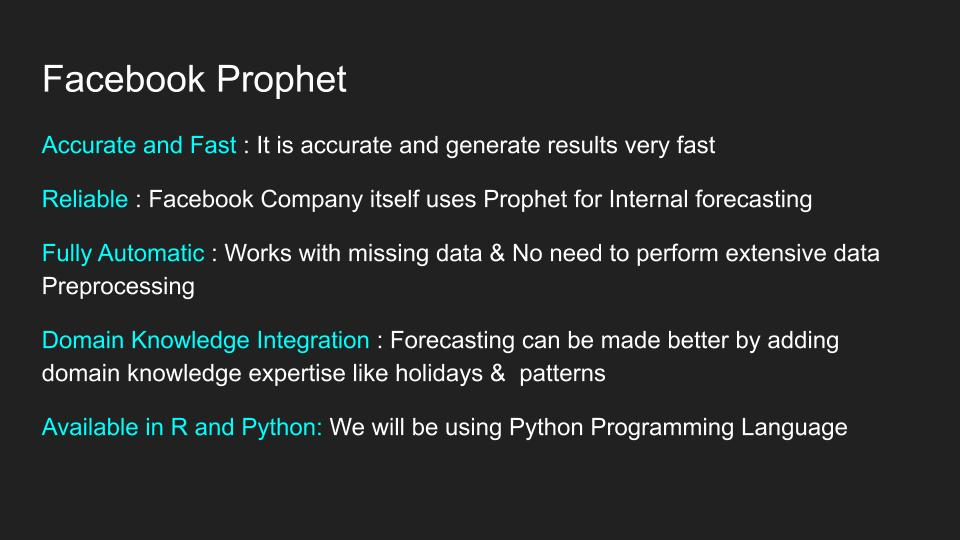

## Data Preperation

In [ ]:
columns=['Date','Close']
ndf=pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2021-05-27,3230.110107
1,2021-05-28,3223.070068
2,2021-06-01,3218.649902
3,2021-06-02,3233.989990
4,2021-06-03,3187.010010
...,...,...
248,2022-05-20,2151.820068
249,2022-05-23,2151.139893
250,2022-05-24,2082.000000
251,2022-05-25,2135.500000


In [ ]:
prophet_df= ndf.rename(columns={'Date':'ds', "Close":'y'})

In [ ]:
prophet_df

,ds,y
0,2021-05-27,3230.110107
1,2021-05-28,3223.070068
2,2021-06-01,3218.649902
3,2021-06-02,3233.989990
4,2021-06-03,3187.010010
...,...,...
248,2022-05-20,2151.820068
249,2022-05-23,2151.139893
250,2022-05-24,2082.000000
251,2022-05-25,2135.500000


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future= m.make_future_dataframe(periods=30)

In [ ]:
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-27,3390.913061,3172.422627,3643.044842,3390.913061,3390.913061,32.442325,32.442325,32.442325,32.442325,32.442325,32.442325,0.0,0.0,0.0,3423.355386
1,2021-05-28,3390.891256,3175.714742,3652.092976,3390.891256,3390.891256,20.193030,20.193030,20.193030,20.193030,20.193030,20.193030,0.0,0.0,0.0,3411.084286
2,2021-06-01,3390.804036,3191.772443,3672.103336,3390.804036,3390.804036,42.063255,42.063255,42.063255,42.063255,42.063255,42.063255,0.0,0.0,0.0,3432.867291
3,2021-06-02,3390.782231,3181.071075,3667.998152,3390.782231,3390.782231,40.150174,40.150174,40.150174,40.150174,40.150174,40.150174,0.0,0.0,0.0,3430.932405
4,2021-06-03,3390.760426,3182.931036,3662.764584,3390.760426,3390.760426,32.442325,32.442325,32.442325,32.442325,32.442325,32.442325,0.0,0.0,0.0,3423.202751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-06-21,2100.510864,1913.354308,2384.434512,2090.855195,2112.107577,42.063255,42.063255,42.063255,42.063255,42.063255,42.063255,0.0,0.0,0.0,2142.574120
279,2022-06-22,2091.219613,1887.398720,2374.364788,2080.881084,2103.409413,40.150174,40.150174,40.150174,40.150174,40.150174,40.150174,0.0,0.0,0.0,2131.369787
280,2022-06-23,2081.928362,1888.468322,2358.724827,2070.953389,2094.710781,32.442325,32.442325,32.442325,32.442325,32.442325,32.442325,0.0,0.0,0.0,2114.370687
281,2022-06-24,2072.637110,1835.400799,2319.876167,2061.052570,2086.000532,20.193030,20.193030,20.193030,20.193030,20.193030,20.193030,0.0,0.0,0.0,2092.830140


In [ ]:
px.line(forecast, x="ds", y="yhat")

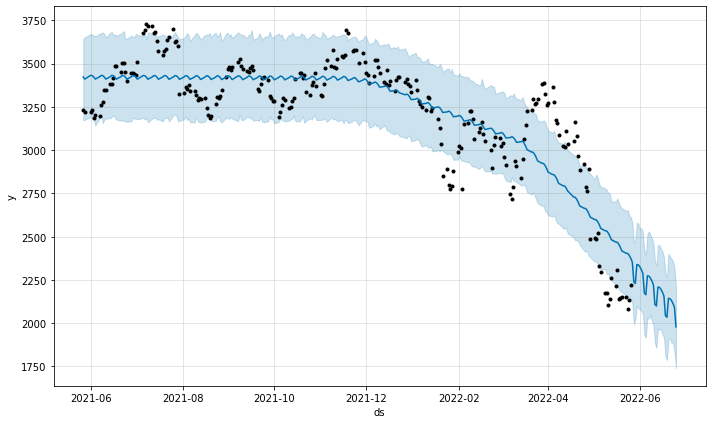

In [ ]:
figure= m.plot(forecast,xlabel='ds',ylabel='y')

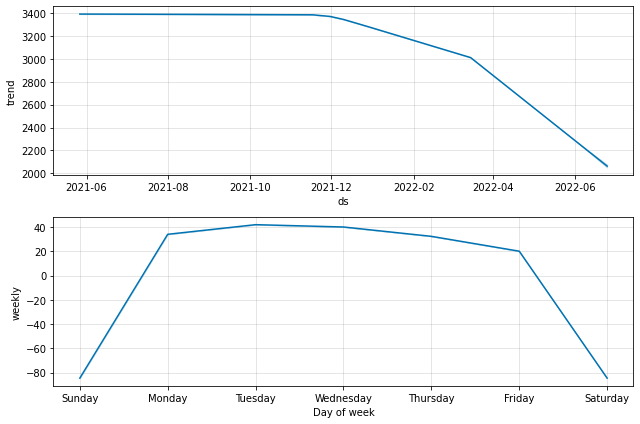

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>